# Kmeans after normalization

Normalization: "Median YOLKSAC BREADTH (mm)"; "Median Yolk sac area(mm2)"; "Median Eye area(mm2)" are divided by "Median length- mm". The results are the new values of features instead of the original.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from sklearn import metrics
%matplotlib inline


In [3]:
data1 = pd.read_csv("./data/cluster 1.csv")
data1

,Unnamed: 0,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),standard_clusters3
0,0,Control Fish water,3.317,0.487,0.186,0.029,1
1,1,Control \n1% DMSO,3.394,0.451,0.182,0.034,1
2,2,C1,3.115,0.436,0.187,0.034,1
3,4,C3,3.327,0.419,0.198,0.031,1
4,5,C4,2.975,0.423,0.187,0.032,1
...,...,...,...,...,...,...,...
71,154,C153,3.237,0.511,0.242,0.032,1
72,157,C156,3.374,0.444,0.209,0.035,1
73,158,C157,3.375,0.392,0.180,0.029,1
74,159,C158,3.516,0.381,0.164,0.034,1


In [4]:
data = data1.drop(columns=["Unnamed: 0", "standard_clusters3"], axis=1)
data

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2)
0,Control Fish water,3.317,0.487,0.186,0.029
1,Control \n1% DMSO,3.394,0.451,0.182,0.034
2,C1,3.115,0.436,0.187,0.034
3,C3,3.327,0.419,0.198,0.031
4,C4,2.975,0.423,0.187,0.032
...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032
72,C156,3.374,0.444,0.209,0.035
73,C157,3.375,0.392,0.180,0.029
74,C158,3.516,0.381,0.164,0.034


## 1. Normalization

In [6]:
#Median YOLKSAC BREADTH Ratio = Median YOLKSAC BREADTH (mm)/Median length- mm
#Median Yolk sac area Ratio = Median Yolk sac area (mm)/Median length- mm
#Median Eye area Ratio = Median Eye area (mm)/Median length- mm
data["Median YOLKSAC BREADTH Ratio"] = data[["Median length- mm", "Median YOLKSAC BREADTH (mm)"]].apply(lambda x:x["Median YOLKSAC BREADTH (mm)"]/x["Median length- mm"],axis=1)
data["Median Yolk sac area Ratio"] = data[["Median length- mm", "Median Yolk sac area(mm2)"]].apply(lambda x:x["Median Yolk sac area(mm2)"]/x["Median length- mm"],axis=1)
data["Median Eye area Ratio"] = data[["Median length- mm", "Median Eye area(mm2)"]].apply(lambda x:x["Median Eye area(mm2)"]/x["Median length- mm"],axis=1)
# data.to_csv("./data/original data with ratio.csv")
data

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915
3,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756
...,...,...,...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886
72,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373
73,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593
74,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670


In [7]:
ratio_data = data[["Median length- mm", "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]]
ratio_data.to_csv("./data/ratio.csv")
ratio_data

,Median length- mm,Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,3.317,0.146819,0.056075,0.008743
1,3.394,0.132882,0.053624,0.010018
2,3.115,0.139968,0.060032,0.010915
3,3.327,0.125939,0.059513,0.009318
4,2.975,0.142185,0.062857,0.010756
...,...,...,...,...
71,3.237,0.157862,0.074761,0.009886
72,3.374,0.131595,0.061944,0.010373
73,3.375,0.116148,0.053333,0.008593
74,3.516,0.108362,0.046644,0.009670


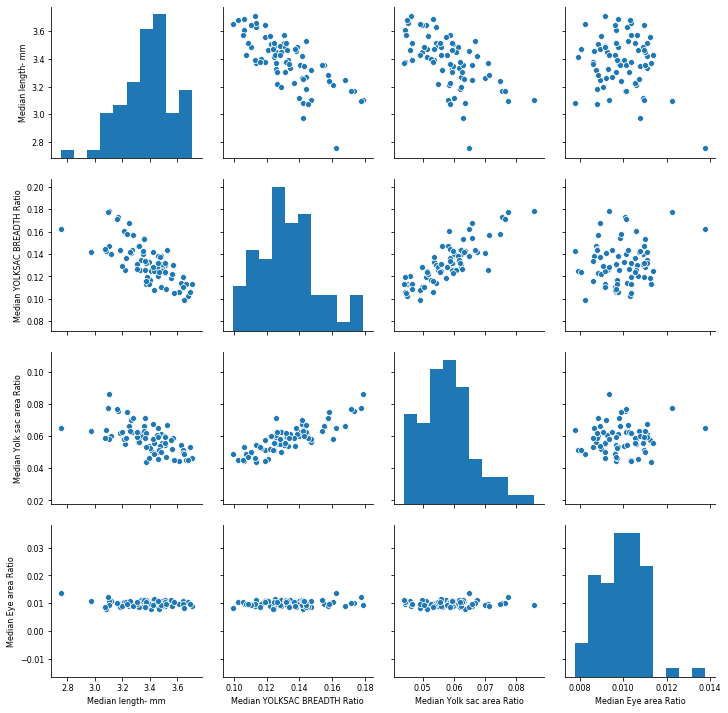

In [8]:
plt.rcParams['font.size'] = 8
sns.pairplot(ratio_data)
plt.savefig("./picture/pair_relationships_ratio.png", dpi=300)

## 2. Kmeans without dimensionality reduction

 **Silhouette Coefficient**

In [9]:
#try 2 clusters to 10 clusters and evaluate the scores.
scores = []
for k in range(2,10):
    labels = KMeans(n_clusters=k).fit(ratio_data).labels_
    score = metrics.silhouette_score(ratio_data, labels)
    scores.append(score)
    
scores

[0.5420773844059729,
 0.5023212597555222,
 0.5076599444098866,
 0.5252889405888711,
 0.5422421924593253,
 0.5071854438513476,
 0.4695959921202619,
 0.46606047917908716]

Text(0, 0.5, 'Sihouette score')

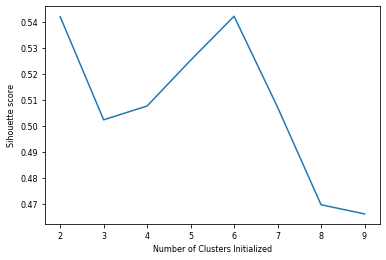

In [10]:
plt.plot(list(range(2,10)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette score")
# plt.savefig("./picture/Sihouette score.png", dpi=300)

From the Sihouette score we can know, the number 2 and 6 are the best number of cluters.

### The number of clusters is 2

In [11]:
kmeans2 = KMeans(n_clusters=2).fit(ratio_data)

In [12]:
data["clusters2"] = kmeans2.labels_

In [13]:
data.sort_values("clusters2").to_csv("./data/ratio_2clusters.csv")
data.sort_values("clusters2")

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,clusters2
75,C159,3.362,0.449,0.198,0.029,0.133551,0.058894,0.008626,0
27,C48,3.513,0.459,0.191,0.034,0.130658,0.054369,0.009678,0
28,C49,3.644,0.402,0.181,0.035,0.110318,0.049671,0.009605,0
29,C51,3.367,0.423,0.239,0.033,0.125631,0.070983,0.009801,0
63,C138,3.355,0.515,0.211,0.037,0.153502,0.062891,0.011028,0
...,...,...,...,...,...,...,...,...,...
44,C89,3.226,0.441,0.190,0.034,0.136702,0.058896,0.010539,1
45,C92,3.270,0.470,0.204,0.031,0.143731,0.062385,0.009480,1
46,C98,3.195,0.412,0.199,0.029,0.128951,0.062285,0.009077,1
15,C25,3.100,0.554,0.266,0.029,0.178710,0.085806,0.009355,1


In [14]:
data.groupby("clusters2").mean()

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
clusters2,,,,,,,
0,3.486796,0.431959,0.190102,0.034510,0.124098,0.054603,0.009898
1,3.190074,0.471556,0.205704,0.031741,0.148043,0.064543,0.009975


In [15]:
#The numbers of samples in each cluster.
clustering_count = pd.DataFrame(data['Compound'].groupby(data['clusters2']).count()).T
clustering_ratio = (clustering_count / len(data)).round(2).rename({'counts':'percentage'})
print("The number of samples in each cluster:")
print(clustering_count)
print("#"*30)
print("The percentage of each cluster:")
print(clustering_ratio)

The number of samples in each cluster:
clusters2   0   1
Compound   49  27
##############################
The percentage of each cluster:
clusters2     0     1
Compound   0.64  0.36


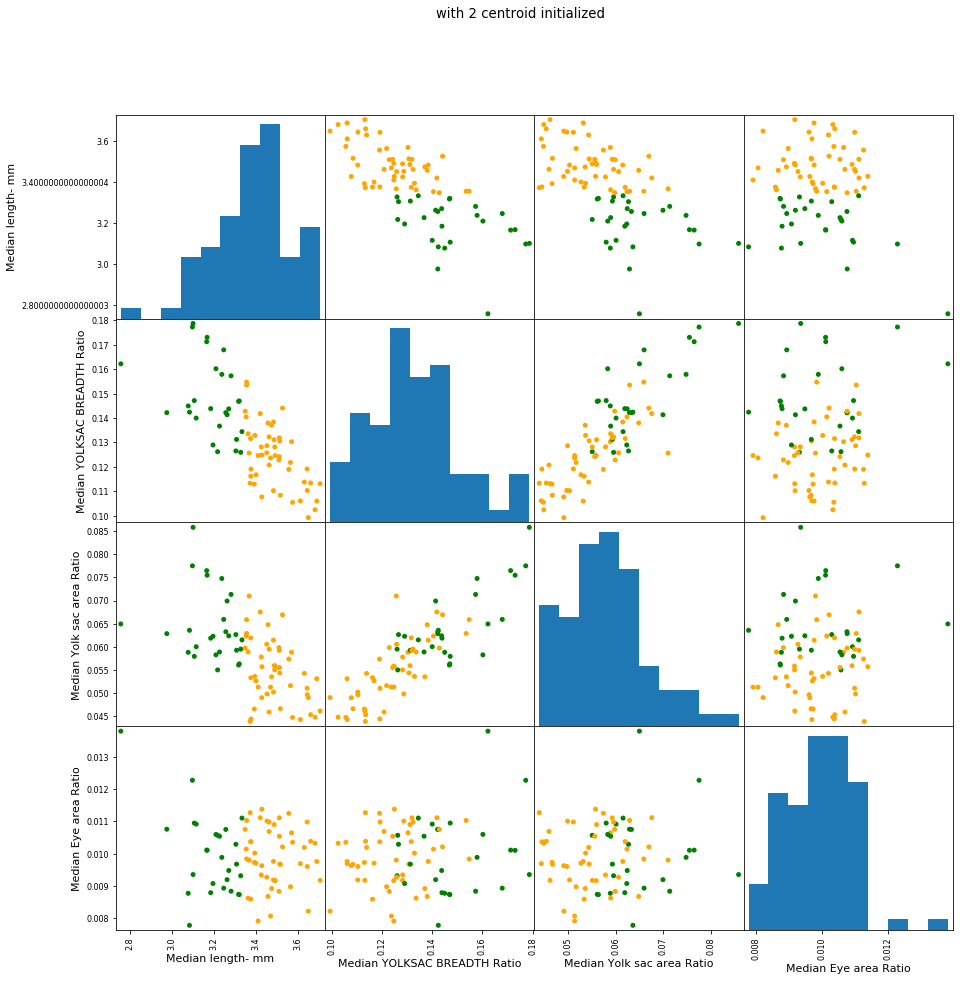

In [16]:
plt.rcParams['font.size'] = 11
colors = np.array(['orange', 'green', 'red', 'blue', 'yellow', 'black'])
scatter_matrix(data[["Median length- mm" , "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]],s=100, alpha=1, c=colors[data["clusters2"]], figsize=(15,15))
plt.suptitle("with 2 centroid initialized")
plt.savefig("./picture/clustering with 2 clusters.png", dpi=300)

### The number of clusters is 6

In [17]:
kmeans6 = KMeans(n_clusters=6).fit(ratio_data)

In [18]:
data["clusters6"] = kmeans6.labels_
data.sort_values("clusters6").to_csv("./data/ratio_6clusters.csv")
data.sort_values("clusters6")

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,clusters2,clusters6
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,1,0
73,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593,0,0
72,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373,0,0
69,C151,3.304,0.418,0.207,0.034,0.126513,0.062651,0.010291,1,0
68,C148,3.425,0.439,0.198,0.032,0.128175,0.057810,0.009343,0,0
...,...,...,...,...,...,...,...,...,...,...
44,C89,3.226,0.441,0.190,0.034,0.136702,0.058896,0.010539,1,5
45,C92,3.270,0.470,0.204,0.031,0.143731,0.062385,0.009480,1,5
50,C109,3.281,0.516,0.234,0.029,0.157269,0.071320,0.008839,1,5
6,C7,3.246,0.545,0.214,0.029,0.167899,0.065927,0.008934,1,5


In [19]:
data.groupby("clusters6").mean()

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,clusters2
clusters6,,,,,,,,
0,3.368375,0.439417,0.192750,0.033333,0.130514,0.057246,0.009895,0.25
1,3.656889,0.399556,0.177889,0.035889,0.109265,0.048647,0.009815,0.00
2,3.079000,0.472000,0.205286,0.031143,0.153229,0.066649,0.010115,1.00
3,3.500364,0.441727,0.193955,0.034545,0.126228,0.055416,0.009867,0.00
4,2.756000,0.447000,0.179000,0.038000,0.162192,0.064949,0.013788,1.00
5,3.224231,0.483615,0.212231,0.031462,0.150034,0.065833,0.009760,1.00


In [20]:
clustering6_count = pd.DataFrame(data['Compound'].groupby(data['clusters6']).count()).T
clustering6_ratio = (clustering6_count / len(data)).round(2).rename({'counts':'percentage'})
clustering6_count
print("The number of samples in each cluster:")
print(clustering6_count)
print("#"*30)
print("The percentage of each cluster:")
print(clustering6_ratio)

The number of samples in each cluster:
clusters6   0  1  2   3  4   5
Compound   24  9  7  22  1  13
##############################
The percentage of each cluster:
clusters6     0     1     2     3     4     5
Compound   0.32  0.12  0.09  0.29  0.01  0.17


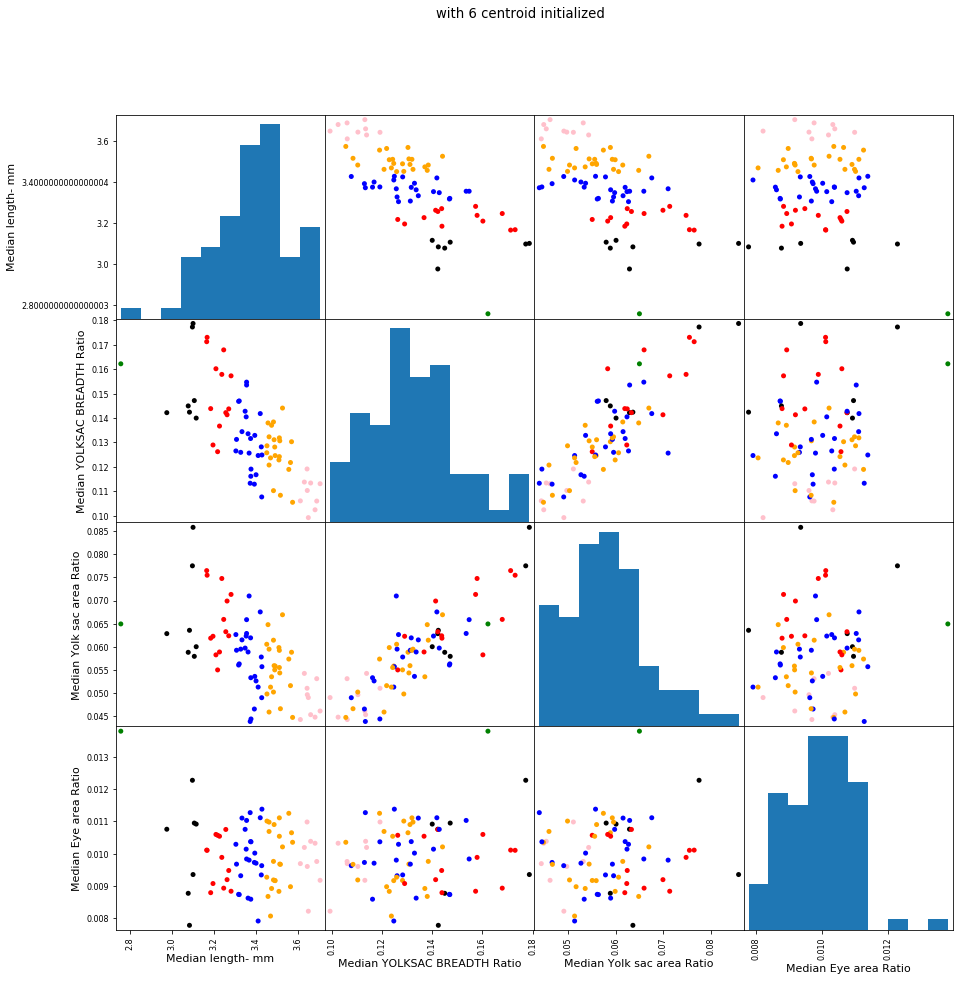

In [21]:
plt.rcParams['font.size'] = 11
colors = np.array(['blue', 'pink', 'black', 'orange', 'green', 'red'])
scatter_matrix(data[["Median length- mm" , "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]],s=100, alpha=1, c=colors[data["clusters6"]], figsize=(15,15))
plt.suptitle("with 6 centroid initialized")
plt.savefig("./picture/clustering with 6 clusters.png", dpi=300)

## 3. KMeans with PCA

In [22]:
 from sklearn.decomposition import PCA

In [23]:
ratio_data

,Median length- mm,Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,3.317,0.146819,0.056075,0.008743
1,3.394,0.132882,0.053624,0.010018
2,3.115,0.139968,0.060032,0.010915
3,3.327,0.125939,0.059513,0.009318
4,2.975,0.142185,0.062857,0.010756
...,...,...,...,...
71,3.237,0.157862,0.074761,0.009886
72,3.374,0.131595,0.061944,0.010373
73,3.375,0.116148,0.053333,0.008593
74,3.516,0.108362,0.046644,0.009670


In [24]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ratio_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,0.065162,0.006905
1,-0.012689,-0.000661
2,0.266149,-0.013493
3,0.053763,-0.009715
4,0.405958,-0.021307
...,...,...
71,0.146264,0.018476
72,0.007395,0.000115
73,0.005015,-0.017393
74,-0.136309,-0.016160


**Silhouette Coefficient**

In [25]:
scores_pca = []
for k in range(2,10):
    labels_pca = KMeans(n_clusters=k).fit(principalComponents).labels_
    score_pca = metrics.silhouette_score(principalComponents, labels_pca)
    scores_pca.append(score_pca)
    
scores_pca

[0.5432167477253717,
 0.50275286183242,
 0.5105704816459348,
 0.5290109545354221,
 0.5472123729841721,
 0.5138228476937324,
 0.47607357659123606,
 0.476775702000043]

Text(0, 0.5, 'Sihouette score')

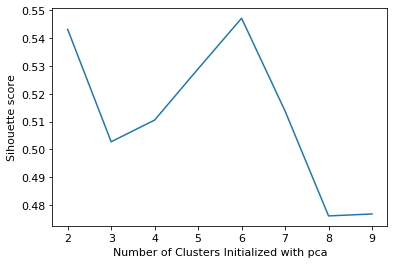

In [26]:
plt.plot(list(range(2,10)), scores_pca)
plt.xlabel("Number of Clusters Initialized with pca")
plt.ylabel("Sihouette score")

**After dimensionality reduction, Sihouette score shows 2 and 6 is better.**

### The number of clusters is 2

In [27]:
pca_kmeans2 = KMeans(n_clusters=2).fit(principalDf)

In [28]:
principalDf['pca_clusters2'] = pca_kmeans2.labels_
principalDf

,principal component 1,principal component 2,pca_clusters2
0,0.065162,0.006905,0
1,-0.012689,-0.000661,1
2,0.266149,-0.013493,0
3,0.053763,-0.009715,0
4,0.405958,-0.021307,0
...,...,...,...
71,0.146264,0.018476,0
72,0.007395,0.000115,1
73,0.005015,-0.017393,1
74,-0.136309,-0.016160,1


In [29]:
pca2_data = pd.concat([data, principalDf], axis=1)
pca2_data = pca2_data.drop(columns = ["clusters2", "clusters6"], axis=1)
pca2_data

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_clusters2
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,0.065162,0.006905,0
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018,-0.012689,-0.000661,1
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915,0.266149,-0.013493,0
3,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318,0.053763,-0.009715,0
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756,0.405958,-0.021307,0
...,...,...,...,...,...,...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886,0.146264,0.018476,0
72,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373,0.007395,0.000115,1
73,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593,0.005015,-0.017393,1
74,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670,-0.136309,-0.016160,1


In [30]:
pca2_data.sort_values("pca_clusters2").to_csv("./data/ratio_pca_2clusters.csv")
pca2_data.sort_values("pca_clusters2")

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_clusters2
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,0.065162,0.006905,0
39,C69,3.262,0.461,0.228,0.030,0.141324,0.069896,0.009197,0.119988,0.003451,0
40,C70,3.209,0.514,0.187,0.034,0.160175,0.058274,0.010595,0.173871,0.011405,0
42,C77,3.184,0.458,0.197,0.028,0.143844,0.061872,0.008794,0.197698,-0.003793,0
44,C89,3.226,0.441,0.190,0.034,0.136702,0.058896,0.010539,0.155222,-0.008195,0
...,...,...,...,...,...,...,...,...,...,...,...
43,C78,3.574,0.377,0.160,0.037,0.105484,0.044768,0.010353,-0.194393,-0.014990,1
13,C17,3.569,0.465,0.210,0.038,0.130289,0.058840,0.010647,-0.187184,0.012959,1
11,C13,3.420,0.485,0.231,0.038,0.141813,0.067544,0.011111,-0.037550,0.015325,1
48,C105,3.452,0.444,0.172,0.038,0.128621,0.049826,0.011008,-0.070930,-0.001551,1


In [31]:
pca2_data.groupby("pca_clusters2").mean().to_csv("./data/mean_ratio_pca_2clusters.csv")
pca2_data.groupby("pca_clusters2").mean()

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2
pca_clusters2,,,,,,,,,
0,3.211065,0.474677,0.206290,0.032161,0.148019,0.064306,0.010035,0.171096,0.003134
1,3.498711,0.426289,0.188311,0.034467,0.121986,0.053883,0.009850,-0.117866,-0.002159


In [32]:
pca_clustering2_count = pd.DataFrame(pca2_data['Compound'].groupby(pca2_data['pca_clusters2']).count()).T
pca_clustering2_ratio = (pca_clustering2_count / len(pca2_data)).round(2).rename({'counts':'percentage'})
print("The number of samples in each cluster:")
print(pca_clustering2_count)
print("#"*30)
print("The percentage of each cluster:")
print(pca_clustering2_ratio)

The number of samples in each cluster:
pca_clusters2   0   1
Compound       31  45
##############################
The percentage of each cluster:
pca_clusters2     0     1
Compound       0.41  0.59


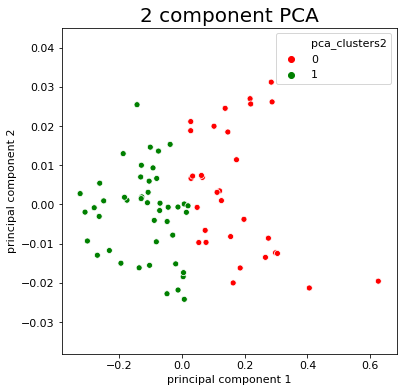

In [33]:
x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
fig = plt.figure(figsize = (6,6))
sns.scatterplot(x_axis, y_axis, hue = principalDf['pca_clusters2'], palette = ['red', 'green'])
plt.title('2 component PCA', fontsize = 20)
plt.savefig("./picture/pca_2clusters.png", dpi=300)
plt.show()


### The number of clusters is 6

In [34]:
pca_kmeans6 = KMeans(n_clusters=6).fit(principalComponents)


In [35]:
principalDf['pca_clusters6'] = pca_kmeans6.labels_
principalDf

,principal component 1,principal component 2,pca_clusters2,pca_clusters6
0,0.065162,0.006905,0,2
1,-0.012689,-0.000661,1,2
2,0.266149,-0.013493,0,4
3,0.053763,-0.009715,0,2
4,0.405958,-0.021307,0,4
...,...,...,...,...
71,0.146264,0.018476,0,1
72,0.007395,0.000115,1,2
73,0.005015,-0.017393,1,2
74,-0.136309,-0.016160,1,5


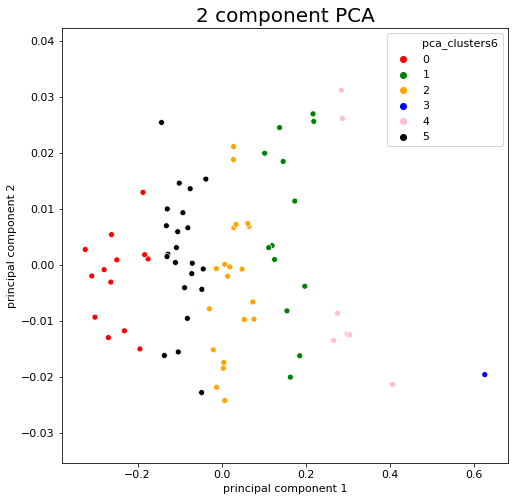

In [36]:
x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x_axis, y_axis, hue = principalDf['pca_clusters6'], palette = ['red', 'green', 'orange', 'blue', 'pink', 'black'])
plt.title('2 component PCA', fontsize = 20)
plt.savefig("./picture/pca_6clusters", dpi=300)
plt.show()


In [37]:
pca6_data = pd.concat([data, principalDf], axis=1)
pca6_data = pca6_data.drop(columns = ["clusters2", "clusters6"], axis=1)

In [38]:
pca6_data.sort_values("pca_clusters6").to_csv("./data/ratio_pca_6clusters.csv")
pca6_data.sort_values("pca_clusters6")

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_clusters2,pca_clusters6
13,C17,3.569,0.465,0.210,0.038,0.130289,0.058840,0.010647,-0.187184,0.012959,1,0
24,C41,3.643,0.434,0.186,0.040,0.119133,0.051057,0.010980,-0.261996,0.005417,1,0
22,C38,3.611,0.383,0.160,0.035,0.106065,0.044309,0.009693,-0.231249,-0.011750,1,0
21,C37,3.660,0.415,0.166,0.038,0.113388,0.045355,0.010383,-0.279529,-0.000841,1,0
20,C34,3.556,0.423,0.204,0.040,0.118954,0.057368,0.011249,-0.175097,0.001079,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23,C40,3.509,0.431,0.210,0.031,0.122827,0.059846,0.008834,-0.127890,0.001925,1,5
27,C48,3.513,0.459,0.191,0.034,0.130658,0.054369,0.009678,-0.131461,0.007001,1,5
35,C60,3.489,0.447,0.192,0.032,0.128117,0.055030,0.009172,-0.107703,0.003098,1,5
60,C127,3.511,0.463,0.208,0.039,0.131871,0.059242,0.011108,-0.129236,0.009998,1,5


In [39]:
mean_pca6 = pca6_data.groupby("pca_clusters6").mean()
mean_pca6 = mean_pca6.drop(["pca_clusters2"], axis=1)
mean_pca6.to_csv("./data/mean_ratio_pca_6clusters.csv")
mean_pca6

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2
pca_clusters6,,,,,,,,,
0,3.628846,0.407308,0.181462,0.036154,0.112299,0.050033,0.009966,-0.248418,-0.002301
1,3.224231,0.483615,0.212231,0.031462,0.150034,0.065833,0.009760,0.158162,0.006634
2,3.357050,0.441250,0.191900,0.032900,0.131491,0.057191,0.009801,0.024147,-0.003317
3,2.756000,0.447000,0.179000,0.038000,0.162192,0.064949,0.013788,0.625807,-0.019571
4,3.079000,0.472000,0.205286,0.031143,0.153229,0.066649,0.010115,0.303199,-0.001555
5,3.474773,0.442727,0.195318,0.034318,0.127410,0.056211,0.009878,-0.093537,0.001840


In [40]:
pca_clustering6_count = pd.DataFrame(pca6_data['Compound'].groupby(pca6_data['pca_clusters6']).count()).T
pca_clustering6_ratio = (pca_clustering6_count / len(pca6_data)).round(2).rename({'counts':'percentage'})
print("The number of samples in each cluster:")
print(pca_clustering6_count)
print("#"*30)
print("The percentage of each cluster:")
print(pca_clustering6_ratio)

The number of samples in each cluster:
pca_clusters6   0   1   2  3  4   5
Compound       13  13  20  1  7  22
##############################
The percentage of each cluster:
pca_clusters6     0     1     2     3     4     5
Compound       0.17  0.17  0.26  0.01  0.09  0.29


In [41]:
ratio_data

,Median length- mm,Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,3.317,0.146819,0.056075,0.008743
1,3.394,0.132882,0.053624,0.010018
2,3.115,0.139968,0.060032,0.010915
3,3.327,0.125939,0.059513,0.009318
4,2.975,0.142185,0.062857,0.010756
...,...,...,...,...
71,3.237,0.157862,0.074761,0.009886
72,3.374,0.131595,0.061944,0.010373
73,3.375,0.116148,0.053333,0.008593
74,3.516,0.108362,0.046644,0.009670


**The number of clusters is 4 to compare with old standardscalar**

In [42]:
pca_kmeans4 = KMeans(n_clusters=4).fit(principalComponents)

In [43]:
principalDf['pca_clusters4'] = pca_kmeans4.labels_
principalDf

,principal component 1,principal component 2,pca_clusters2,pca_clusters6,pca_clusters4
0,0.065162,0.006905,0,2,0
1,-0.012689,-0.000661,1,2,2
2,0.266149,-0.013493,0,4,1
3,0.053763,-0.009715,0,2,0
4,0.405958,-0.021307,0,4,1
...,...,...,...,...,...
71,0.146264,0.018476,0,1,0
72,0.007395,0.000115,1,2,0
73,0.005015,-0.017393,1,2,0
74,-0.136309,-0.016160,1,5,2


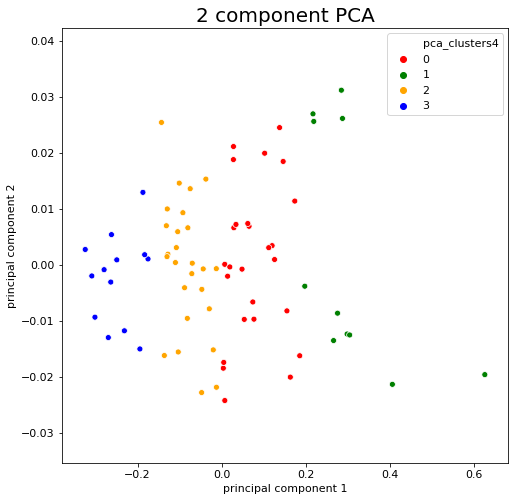

In [46]:
x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x_axis, y_axis, hue = principalDf['pca_clusters4'], palette = ['red', 'green', 'orange', 'blue'])
plt.title('2 component PCA', fontsize = 20)
plt.savefig("./picture/pca_4clusters", dpi=300)
plt.show()



In [50]:
pca4_data = pd.concat([data, principalDf], axis=1)
pca4_data = pca4_data.drop(columns = ["clusters2", "clusters6"], axis=1)

In [51]:
pca4_data.sort_values("pca_clusters4").to_csv("./data/ratio_pca_4clusters.csv")
pca4_data.sort_values("pca_clusters4")

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_clusters2,pca_clusters6,pca_clusters4
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743,0.065162,0.006905,0,2,0
39,C69,3.262,0.461,0.228,0.030,0.141324,0.069896,0.009197,0.119988,0.003451,0,1,0
40,C70,3.209,0.514,0.187,0.034,0.160175,0.058274,0.010595,0.173871,0.011405,0,1,0
44,C89,3.226,0.441,0.190,0.034,0.136702,0.058896,0.010539,0.155222,-0.008195,0,1,0
45,C92,3.270,0.470,0.204,0.031,0.143731,0.062385,0.009480,0.111973,0.003084,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,C78,3.574,0.377,0.160,0.037,0.105484,0.044768,0.010353,-0.194393,-0.014990,1,0,3
13,C17,3.569,0.465,0.210,0.038,0.130289,0.058840,0.010647,-0.187184,0.012959,1,0,3
19,C30,3.630,0.413,0.197,0.037,0.113774,0.054270,0.010193,-0.249337,0.000911,1,0,3
28,C49,3.644,0.402,0.181,0.035,0.110318,0.049671,0.009605,-0.263680,-0.003051,1,0,3


In [54]:
mean_pca4 = pca4_data.groupby("pca_clusters4").mean()
mean_pca4 = mean_pca4.drop(columns = ["pca_clusters2", "pca_clusters6"], axis=1)
mean_pca4.to_csv("./data/mean_ratio_pca_4clusters.csv")
mean_pca4

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2
pca_clusters4,,,,,,,,,
0,3.305538,0.458000,0.200962,0.032615,0.138652,0.060834,0.009866,0.076128,0.000637
1,3.075000,0.481727,0.208545,0.031636,0.156629,0.067753,0.010327,0.307468,0.001668
2,3.463115,0.438308,0.191962,0.033923,0.126547,0.055416,0.009795,-0.082002,-0.000192
3,3.628846,0.407308,0.181462,0.036154,0.112299,0.050033,0.009966,-0.248418,-0.002301


In [55]:
pca_clustering4_count = pd.DataFrame(pca4_data['Compound'].groupby(pca4_data['pca_clusters4']).count()).T
pca_clustering4_ratio = (pca_clustering4_count / len(pca6_data)).round(2).rename({'counts':'percentage'})
print("The number of samples in each cluster:")
print(pca_clustering4_count)
print("#"*30)
print("The percentage of each cluster:")
print(pca_clustering4_ratio)

The number of samples in each cluster:
pca_clusters4   0   1   2   3
Compound       26  11  26  13
##############################
The percentage of each cluster:
pca_clusters4     0     1     2     3
Compound       0.34  0.14  0.34  0.17
